C = 0.100 nF
R = 100.000 M ohms
tau = 10.000 ms
(Theoretical)
tau = 10.000 ms
(Experimental)


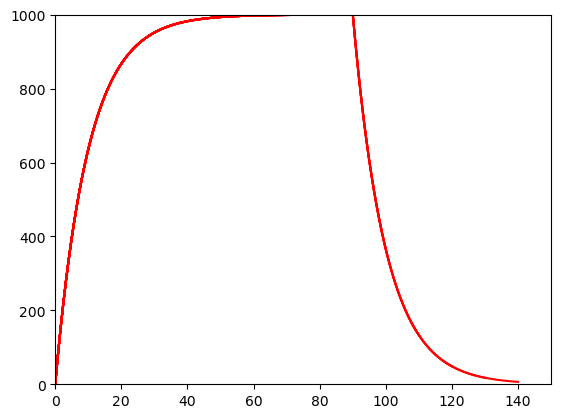

In [1]:
from __future__ import print_function
"""
Created on Wed Apr 22 15:53:00 2015

Charging and discharging curves for passive membrane patch
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt

# input current
I = 10 # nA

# capacitance and leak resistance

C = 0.1 # nF
R = 100 # M ohms
tau = R*C # = 0.1*100 nF-Mohms = 100*100 pF Mohms = 10 ms
print('C = %.3f nF' % C)
print('R = %.3f M ohms' % R)
print('tau = %.3f ms' % tau)
print('(Theoretical)')

# membrane potential equation dV/dt = - V/RC + I/C

tstop = 150 # ms

V_inf = I*R # peak V (in mV)
tau = 0 # experimental (ms)

h = 0.2 # ms (step size)

V = 0 # mV
V_trace = [V] # mV

for t in np.arange(h, tstop, h):

   # Euler method: V(t+h) = V(t) + h*dV/dt
   V = V +h*(- (V/(R*C)) + (I/C))

   # Verify membrane time constant
   if (not tau and (V > 0.6321*V_inf)):
     tau = t
     print('tau = %.3f ms' % tau)
     print('(Experimental)')

   
   # Stop current injection 
   if t >= 0.6*tstop:
     I = 0

   V_trace += [V]
   if t % 10 == 0:
       plt.plot(np.arange(0,t+h, h), V_trace, color='r')
       plt.xlim(0, tstop)
       plt.ylim(0, V_inf)
       plt.draw()
       
plt.show()


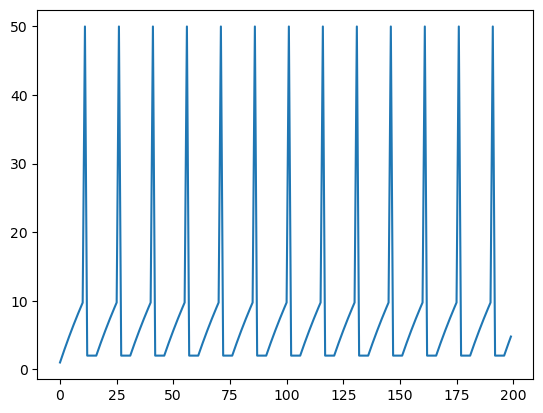

In [2]:
from __future__ import print_function
"""
Created on Wed Apr 22 16:02:53 2015

Basic integrate-and-fire neuron 
R Rao 2007

translated to Python by rkp 2015
"""

import numpy as np
import matplotlib.pyplot as plt


# input current
I = 1 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold

for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter

   V_trace += [V]


plt.plot(V_trace)
plt.show()



In [3]:
% Basic integrate-and-fire neuron 
% R Rao 2007

clear
% input current
I = 1 % nA

% capacitance and leak resistance
C = 1 % nF
R = 40 % M ohms

% I & F implementation dV/dt = - V/RC + I/C
% Using h = 1 ms step size, Euler method

V = 0;
tstop = 200;
abs_ref = 5; % absolute refractory period 
ref = 0; % absolute refractory period counter
V_trace = []; % voltage trace for plotting
V_th = 10; % spike threshold

for t = 1:tstop
  
   if ~ref
     V = V - (V/(R*C)) + (I/C)
   else
     ref = ref - 1;
     V = 0.2*V_th; % reset voltage
   end
   
   if (V > V_th)
     V = 50;  % emit spike
     ref = abs_ref; % set refractory counter
   end

   V_trace = [V_trace V];

end

  plot(V_trace)


SyntaxError: invalid syntax (4186257412.py, line 10)

The largest current that will fail to cause the neuron to spike is 100.0 pA


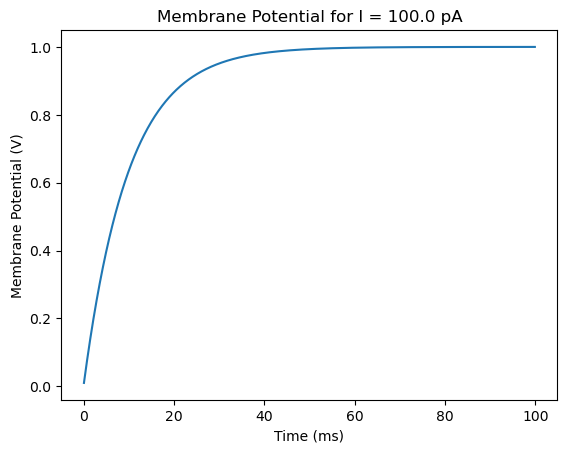

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
C = 1.0  # Capacitance, in uF/cm^2
R = 10.0  # Resistance, in kOhm*cm^2
tau = R * C  # Time constant, in ms
V_th = 1.0  # Threshold voltage, in V
V_reset = 0.0  # Reset voltage, in V
dt = 0.1  # Time step, in ms
T = 100  # Total simulation time, in ms

# Function to simulate the integrate-and-fire neuron
def integrate_and_fire(I):
    V = 0.0  # Initial membrane potential, in V
    time = np.arange(0, T, dt)
    spikes = []
    
    for t in time:
        dV = (-(V - V_reset) + I * R) * (dt / tau)
        V += dV
        if V >= V_th:
            spikes.append(t)
            V = V_reset

    return spikes

# Vary the input current
I_values = np.arange(0, 1.0, 0.01)  # Current values in uA/cm^2
for I in I_values:
    spikes = integrate_and_fire(I)
    if not spikes:  # No spikes detected
        largest_current_without_spike = I * 1000  # Convert uA/cm^2 to pA
    else:
        break

print(f"The largest current that will fail to cause the neuron to spike is {largest_current_without_spike // 10 * 10} pA")

# Plot the membrane potential for the largest current without spike
I = largest_current_without_spike / 1000  # Convert pA to uA/cm^2
V = 0.0
time = np.arange(0, T, dt)
V_trace = []
for t in time:
    dV = (-(V - V_reset) + I * R) * (dt / tau)
    V += dV
    V_trace.append(V)

plt.plot(time, V_trace)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (V)')
plt.title(f'Membrane Potential for I = {largest_current_without_spike // 10 * 10} pA')
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
C = 1.0  # Capacitance, in uF/cm^2
R = 10.0  # Resistance, in kOhm*cm^2
tau = R * C  # Time constant, in ms
V_th = 1.0  # Threshold voltage, in V
V_reset = 0.0  # Reset voltage, in V
dt = 0.01  # Time step, in ms
T = 100  # Total simulation time, in ms

# Function to simulate the integrate-and-fire neuron
def integrate_and_fire(I):
    V = 0.0  # Initial membrane potential, in V
    time = np.arange(0, T, dt)
    spikes = []
    
    for t in time:
        dV = (-(V - V_reset) + I * R) * (dt / tau)
        V += dV
        if V >= V_th:
            spikes.append(t)
            V = V_reset

    return spikes

# Find the maximum firing rate
I_max = 1.0  # Maximum current to ensure spiking
spikes = integrate_and_fire(I_max)
if spikes:
    spike_intervals = np.diff(spikes)
    T_spike = np.mean(spike_intervals)
    max_firing_rate = 1 / (T_spike / 1000)  # Convert ms to s
    max_firing_rate = round(max_firing_rate)
else:
    max_firing_rate = 0

print(f"The maximum firing rate of the neuron is {max_firing_rate} Hz")


The maximum firing rate of the neuron is 943 Hz


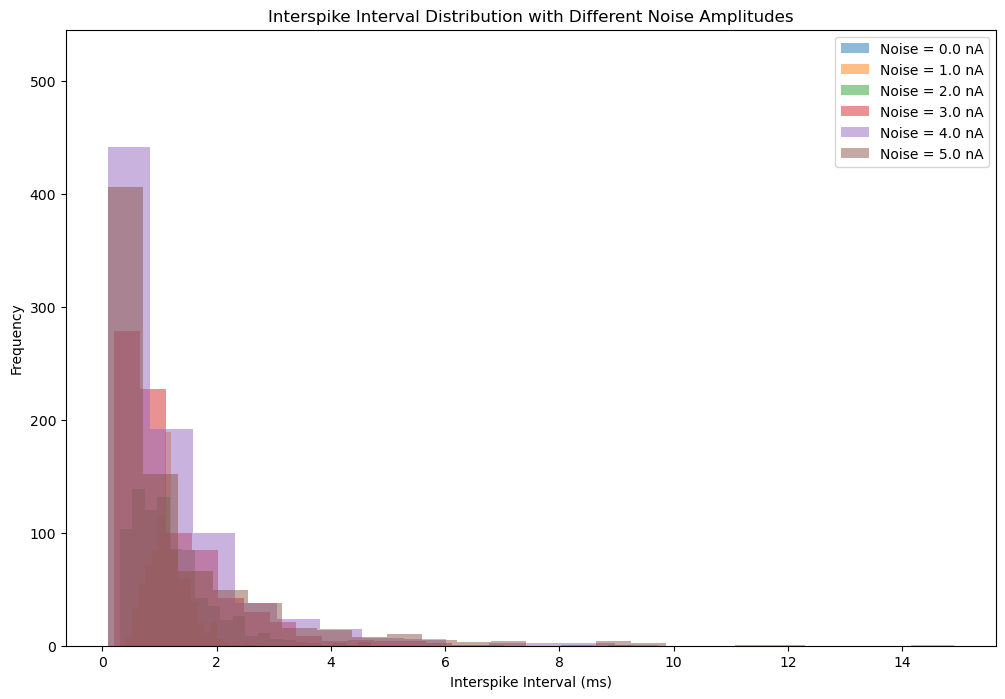

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
C = 1.0  # Capacitance, in uF/cm^2
R = 10.0  # Resistance, in kOhm*cm^2
tau = R * C  # Time constant, in ms
V_th = 1.0  # Threshold voltage, in V
V_reset = 0.0  # Reset voltage, in V
dt = 0.1  # Time step, in ms
T = 1000  # Total simulation time, in ms
I_mean = 1.0  # Constant part of the input current, in nA

# Function to simulate the integrate-and-fire neuron with noise
def integrate_and_fire_with_noise(I_mean, noise_amplitude):
    V = 0.0  # Initial membrane potential, in V
    time = np.arange(0, T, dt)
    spikes = []
    
    for t in time:
        I_noise = noise_amplitude * np.random.randn()  # White noise component
        I = I_mean + I_noise  # Total input current
        dV = (-(V - V_reset) + I * R) * (dt / tau)
        V += dV
        if V >= V_th:
            spikes.append(t)
            V = V_reset

    return spikes

# Range of noise amplitudes to test
noise_amplitudes = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]  # in nA

plt.figure(figsize=(12, 8))

for noise_amplitude in noise_amplitudes:
    spikes = integrate_and_fire_with_noise(I_mean, noise_amplitude)
    if len(spikes) > 1:
        interspike_intervals = np.diff(spikes)
        plt.hist(interspike_intervals, bins=20, alpha=0.5, label=f'Noise = {noise_amplitude} nA')

plt.xlabel('Interspike Interval (ms)')
plt.ylabel('Frequency')
plt.title('Interspike Interval Distribution with Different Noise Amplitudes')
plt.legend()
plt.show()


The largest current that will fail to cause the neuron to spike is 250 pA


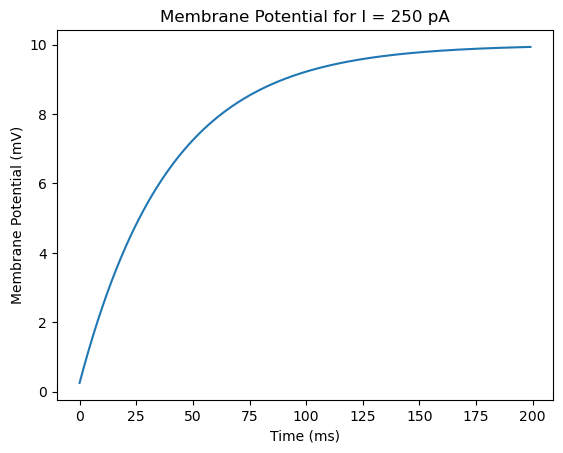

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 1  # nF
R = 40  # M ohms
V_th = 10  # spike threshold, in mV
V_reset = 0  # reset voltage, in mV
abs_ref = 5  # absolute refractory period, in ms
tstop = 200  # total time to simulate, in ms
dt = 1  # time step, in ms

# Function to simulate the integrate-and-fire neuron
def simulate_neuron(I):
    V = 0
    ref = 0
    V_trace = []
    for t in range(tstop):
        if not ref:
            V += (-V / (R * C) + I / C) * dt
        else:
            ref -= 1
            V = V_reset
        
        if V > V_th:
            V = 50  # emit spike
            ref = abs_ref  # set refractory counter
        
        V_trace.append(V)
    
    return V_trace

# Test different input currents
currents = np.arange(0, 1.5, 0.01)  # in nA
no_spike_current = 0

for I in currents:
    V_trace = simulate_neuron(I)
    if max(V_trace) < V_th:
        no_spike_current = I  # record the largest current that doesn't cause a spike
    else:
        break

# Convert current from nA to pA
no_spike_current_pA = int(no_spike_current * 1000) // 10 * 10  # round down to the nearest 10 pA

print(f"The largest current that will fail to cause the neuron to spike is {no_spike_current_pA} pA")

# Plot the membrane potential for the largest current without spike
V_trace = simulate_neuron(no_spike_current)
plt.plot(V_trace)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title(f'Membrane Potential for I = {no_spike_current_pA} pA')
plt.show()
